<a href="https://colab.research.google.com/github/yisusCarrasco/ProyectoTesis/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Llamamos al df de cantidades de uva exportada
df = pd.read_csv("https://raw.githubusercontent.com/yisusCarrasco/ProyectoTesis/main/Cantidades%20de%20uva%20exportada.csv", index_col='Fecha',parse_dates=True)
df.index.freq='MS'

<ipython-input-2-11ebc2c0f5f6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("https://raw.githubusercontent.com/yisusCarrasco/ProyectoTesis/main/Cantidades%20de%20uva%20exportada.csv", index_col='Fecha',parse_dates=True)


In [ ]:
df = df.drop(df.columns[[1]],axis=1)

In [ ]:
df.head(6)

,Cantidad(kg)
Fecha,
2006-01-01,10045884
2006-02-01,1649731
2006-03-01,654574
2006-04-01,90540
2006-05-01,239
2006-06-01,60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2006-01-01 to 2022-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Cantidad(kg)  201 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


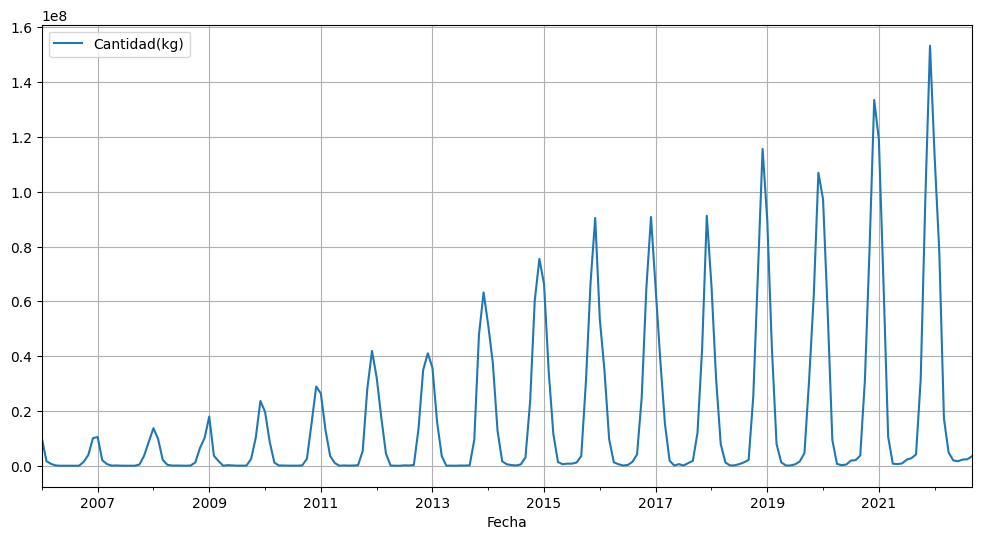

In [ ]:
# Análisis de la cantidad de la cantidad exportada
df.plot(figsize=(12,6))
plt.grid()

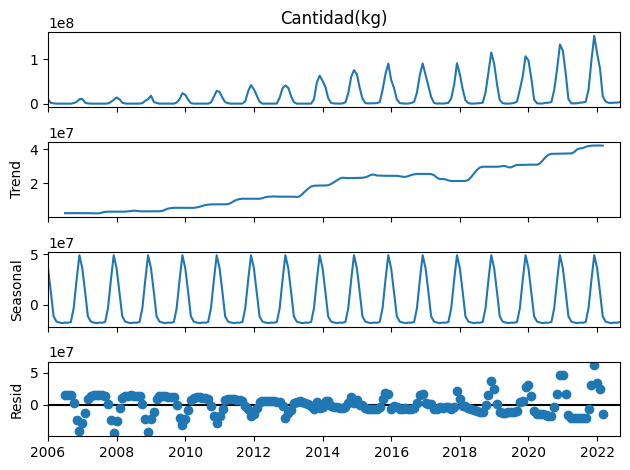

In [ ]:
# Llamamos a la librería seasonal_decompose, esta librería para descomponer en la serie temporal en tendencia, estacionalidad y residuo
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Cantidad(kg)'])
results = seasonal_decompose(df['Cantidad(kg)'])
results.plot();

In [ ]:
len(df)

201

In [ ]:
entrenar = round(len(df)*0.8)
testear = round(len(df)*0.2)
print(entrenar)
print(testear)

161
40


In [ ]:
# Dividimos los datos en 80% entrenamiento y 20% testeo
train = df.iloc[:entrenar]
test = df.iloc[testear:]

In [ ]:
#Escalamos los datos de [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
df.head(),df.tail()

(            Cantidad(kg)
 Fecha                   
 2006-01-01      10045884
 2006-02-01       1649731
 2006-03-01        654574
 2006-04-01         90540
 2006-05-01           239,
             Cantidad(kg)
 Fecha                   
 2022-05-01       1953246
 2022-06-01       1631705
 2022-07-01       2244960
 2022-08-01       2331896
 2022-09-01       3417522)

In [ ]:
scaled_train[:10]

array([[8.68708275e-02],
       [1.42658921e-02],
       [5.66036648e-03],
       [7.82936048e-04],
       [2.06672979e-06],
       [5.18844300e-07],
       [3.45896200e-07],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.21180496e-02]])

In [ ]:
# Llamammos TineseresGenerator para los datos en 3 secuencias
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Cantidad de entrada
n_input = 12
# Características solo hay 1
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# Llamamos las librerías de Tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU

In [ ]:
# definimos el modelo en este caso usaremos la red neuronal LSTM
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features)))
#model.compile(optimizer='adam', loss='mse')
model.compile(optimizer="adam", loss='mse')
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 12, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 12, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 12, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 12, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 362,501 (1.38 MB)

 Trainable params: 362,501 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ajuste del modelo
model.fit(generator,epochs=50)

Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0385
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0384
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0222
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0169
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0110
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0130
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0150
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0143
Epoch 9/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0092
Epoch 10/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0102
Epoch 11/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0162
Epoch 12/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0097
Epoch 13/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0083
Epoch 14/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0093
Epoch 15/50
149/149 ━━━━━━━━━━━━━━━━━

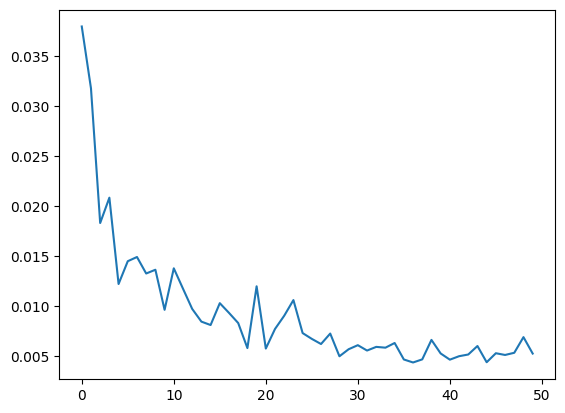

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[0.03781501]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.00176096])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # Obtenemos el valor predicho para el primer lote
    current_pred = model.predict(current_batch)[0]

    # agregamos la predicción a la matriz
    test_predictions.append(current_pred)

    # Usamos la predicción para actualizar el lote y eliminar el primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [ ]:
test_predictions

[array([0.03781501], dtype=float32),
 array([0.02975487], dtype=float32),
 array([0.03197921], dtype=float32),
 array([0.04456894], dtype=float32),
 array([0.09748346], dtype=float32),
 array([0.33584574], dtype=float32),
 array([0.6443167], dtype=float32),
 array([0.632439], dtype=float32),
 array([0.35614118], dtype=float32),
 array([0.09690744], dtype=float32),
 array([0.06508835], dtype=float32),
 array([0.06161371], dtype=float32),
 array([0.05666066], dtype=float32),
 array([0.04106917], dtype=float32),
 array([0.03554004], dtype=float32),
 array([0.04164594], dtype=float32),
 array([0.09080847], dtype=float32),
 array([0.30082896], dtype=float32),
 array([0.5915967], dtype=float32),
 array([0.5468253], dtype=float32),
 array([0.34531036], dtype=float32),
 array([0.1517086], dtype=float32),
 array([0.11579578], dtype=float32),
 array([0.09359853], dtype=float32),
 array([0.06649489], dtype=float32),
 array([0.04535053], dtype=float32),
 array([0.03736532], dtype=float32),
 array(

In [ ]:
test.head()

,Cantidad(kg),Predictions
Fecha,,
2009-05-01,203640,-1.431799e+06
2009-06-01,110306,-1.744375e+06
2009-07-01,20646,-2.635763e+06
2009-08-01,10070,-1.772545e+06
2009-09-01,37392,1.256926e+07


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions
prueba2  = test[test.index > "2019-06-01" ]

<ipython-input-60-d88580b86da6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
print(prueba2)

            Cantidad(kg)   Predictions
Fecha                                 
2019-07-01        518290  1.021186e+07
2019-08-01       1565249  8.106781e+06
2019-09-01       4578660  7.488492e+06
2019-10-01      31204558  8.666526e+06
2019-11-01      62065157  1.373282e+07
2019-12-01     106947835  2.123447e+07
2020-01-01      97274886  3.033497e+07
2020-02-01      55903572  4.022904e+07
2020-03-01       9352051  4.198075e+07
2020-04-01        653661  3.834054e+07
2020-05-01        195258  2.964440e+07
2020-06-01        438330  1.837125e+07
2020-07-01       1894102  1.174390e+07
2020-08-01       2019568  8.679378e+06
2020-09-01       3722333  7.451144e+06
2020-10-01      31228672  7.871541e+06
2020-11-01      79055475  1.148534e+07
2020-12-01     133513733  1.894923e+07
2021-01-01     119187096  2.683101e+07
2021-02-01      66652817  3.702453e+07
2021-03-01      10559499  4.138173e+07
2021-04-01        743388  3.983372e+07
2021-05-01        592328  3.364733e+07
2021-06-01        837852 

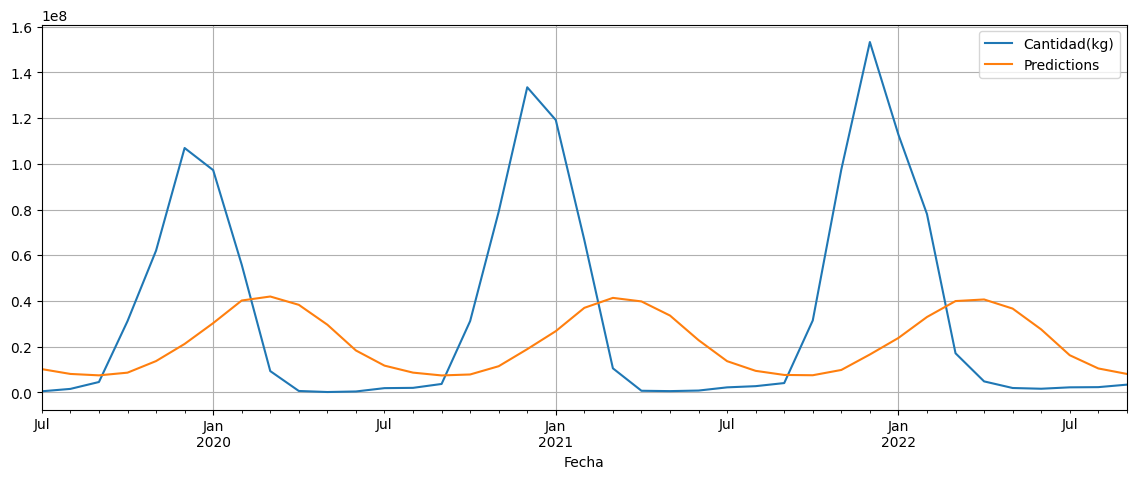

In [ ]:
# Genera la gráfica
ax = prueba2.plot(figsize=(14, 5))

# Agrega una cuadrícula al fondo de la imagen
ax.grid(True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(prueba2['Cantidad(kg)'],prueba2['Predictions']))

print("El error medio cuadrado",rmse)

El error medio cuadrado 48474631.80862674
